In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
#dataset link
#https://www.kaggle.com/harlfoxem/housesalesprediction

In [3]:
df=pd.read_csv('C:/Users/HP/Desktop/DS_project/kc_house_data.csv')

# EDA

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [7]:
#null value checking
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


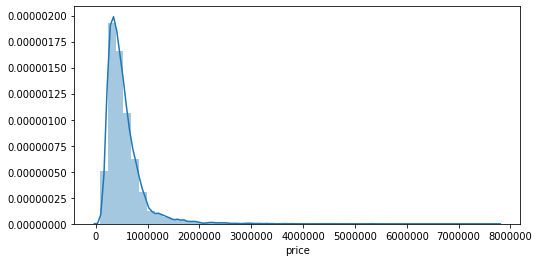

In [9]:
plt.figure(figsize=(8,4))
sns.distplot(df['price']) 

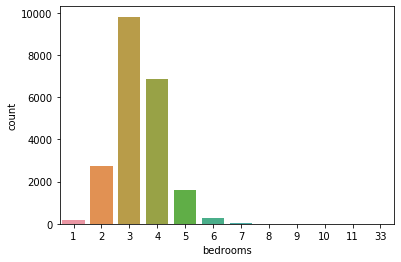

In [10]:
sns.countplot(df['bedrooms']);

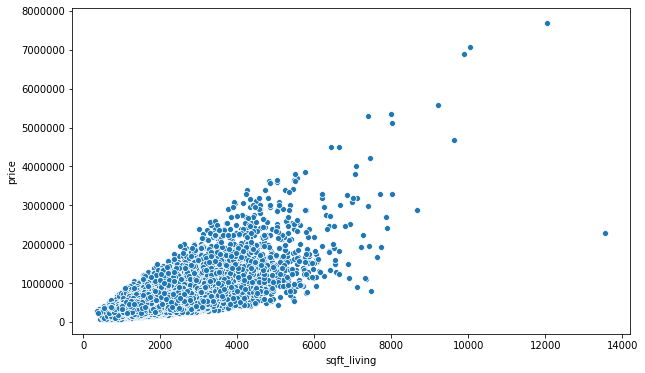

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='sqft_living',y='price',data=df)

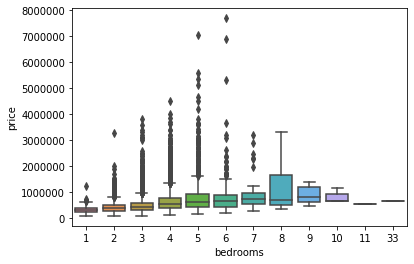

In [12]:
sns.boxplot(x='bedrooms',y='price',data=df)

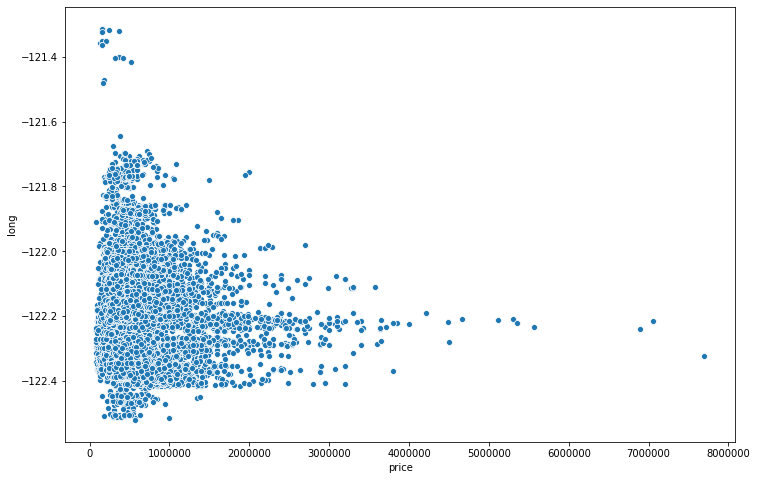

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

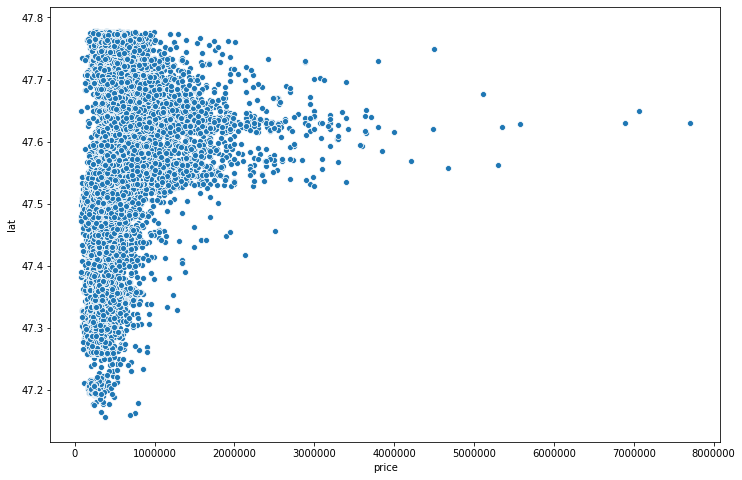

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

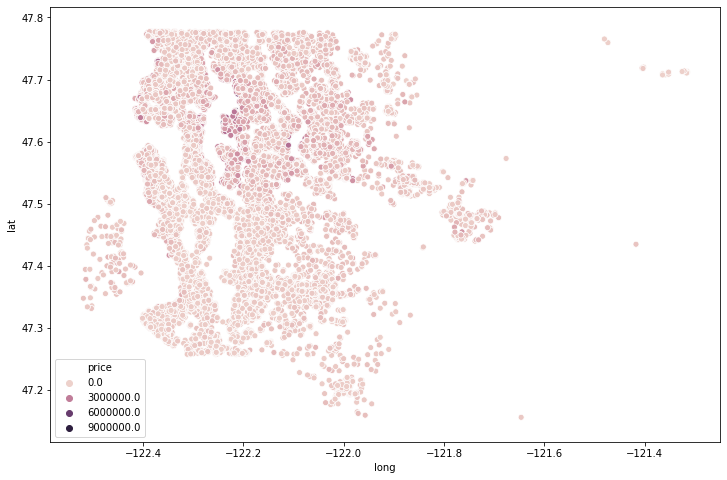

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',hue='price',data=df)

In [16]:
#house price is higher  in bay area (near lat 122.2 , long 47.6)
#those can be seen from the above 3 scatter plot also

In [17]:
df.sort_values(by='price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [18]:
len(df)*.01

215.97

In [19]:
top_1_pec=df.sort_values('price',ascending='False').iloc[:216]
non_top_1_pec=df.sort_values('price',ascending='False').iloc[216:]

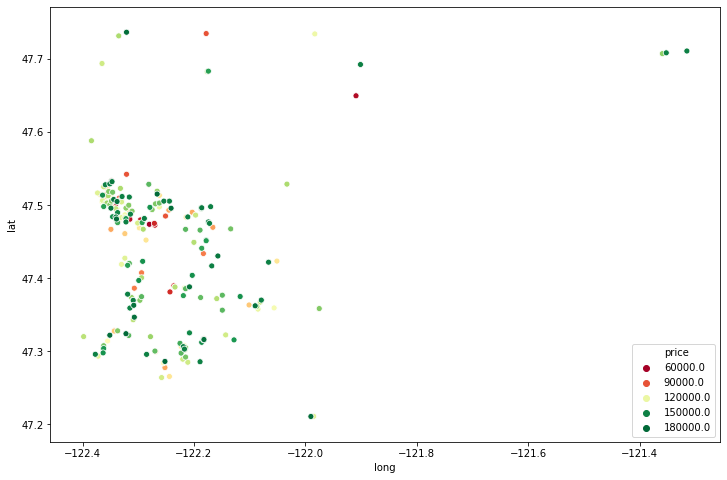

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',hue='price',data=top_1_pec,palette='RdYlGn')

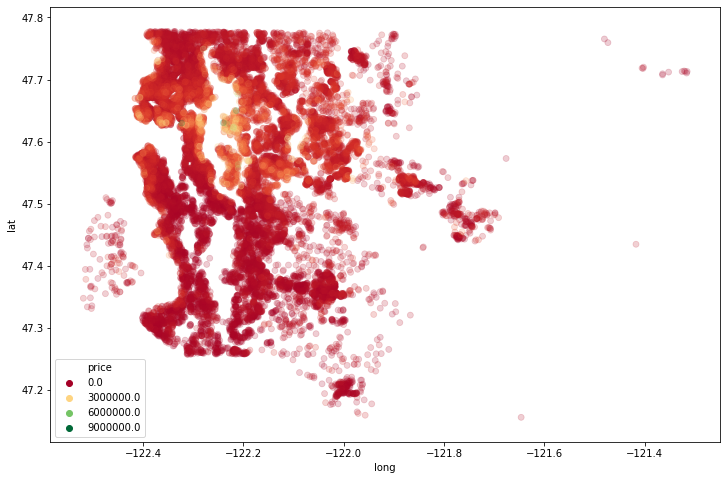

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',hue='price',data=non_top_1_pec,palette='RdYlGn',alpha=.2,edgecolor=None)

In [22]:
#PRICE OF THE HOUSE IN BAY AREA IS HIGHER, IT IS CLEAR FROM THE SCATTER DIAGRAM AND ALSO FROM THE BOXPLOT

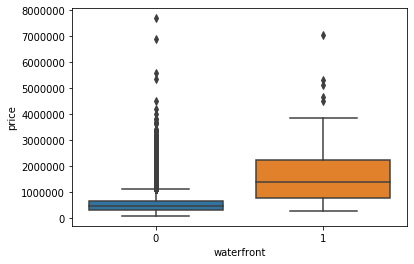

In [23]:
sns.boxplot(x='waterfront',y='price',data=df)

# Feature Engineering

In [24]:
df['date']=pd.to_datetime(df['date'])
df['month']=df['date'].apply(lambda date: date.month)
df['year']=df['date'].apply(lambda date: date.year)

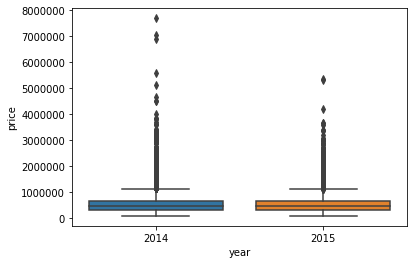

In [25]:
sns.boxplot(x='year',y='price',data=df)

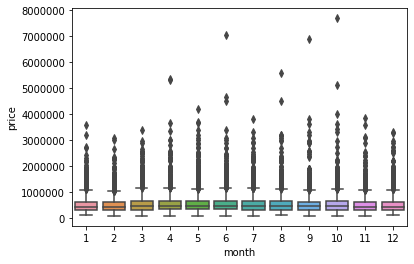

In [26]:
sns.boxplot(x='month',y='price',data=df)

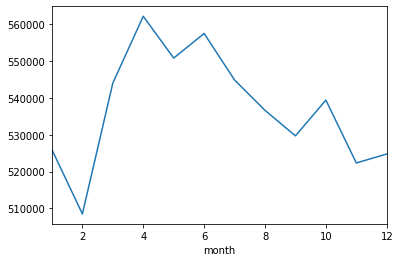

In [27]:
df.groupby(by='month').mean()['price'].plot()

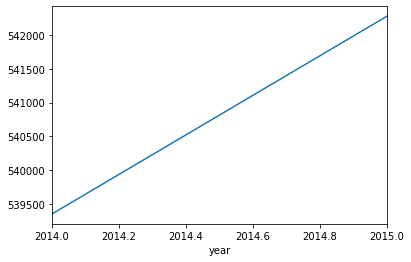

In [28]:
df.groupby(by='year').mean()['price'].plot() #clearly house price is increasing with year maybe because of inflation

In [29]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [30]:
df=df.drop('date',axis=1)

In [31]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [32]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
2007       35
2005       35
2004       26
1990       25
2006       24
2009       22
1989       22
2002       22
1991       20
2001       19
1998       19
1994       19
1993       19
1987       18
1983       18
1984       18
2010       18
2008       18
1986       17
1985       17
1999       17
1992       17
2015       16
1995       16
1996       15
        ...  
1975        6
1978        6
1981        5
1964        5
1965        5
1958        5
1973        5
1969        4
1972        4
1960        4
1963        4
1956        3
1945        3
1974        3
1953        3
1955        3
1976        3
1957        3
1962        2
1950        2
1967        2
1946        2
1971        2
1940        2
1954        1
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [33]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
400       184
1000      149
900       144
300       142
200       108
530       107
480       106
750       105
450       103
720       102
620        91
580        85
840        85
420        81
860        80
1100       80
670        79
780        77
380        76
850        76
550        76
650        76
680        75
240        74
360        73
        ...  
1525        1
2580        1
2500        1
2180        1
1990        1
1284        1
516         1
276         1
20          1
915         1
2850        1
1798        1
2310        1
266         1
2120        1
1913        1
1481        1
3480        1
3000        1
2600        1
2360        1
1960        1
295         1
1880        1
1816        1
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [34]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
year             0.003727
month           -0.009928
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

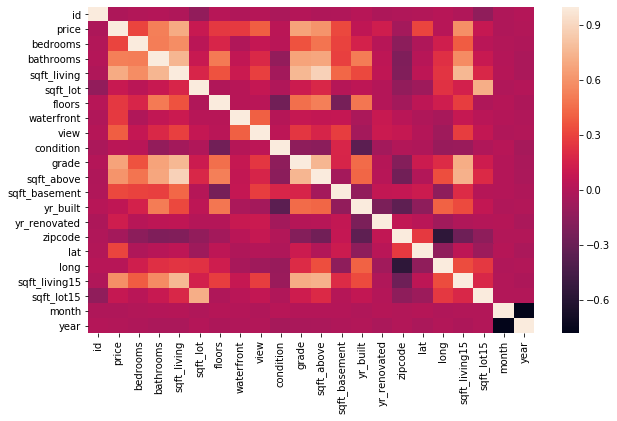

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())

In [36]:
df=df.drop('zipcode',axis=1)# we are keeping lat & longitude so no need to keep zipcode

In [37]:
df=df.drop('id',axis=1)#irrelevant feature (very low correlation with price also from the domain knowledge)

# model selection

In [38]:
x=df.drop('price',axis=1)
y=df['price']
x.shape

(21597, 19)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

# scalling

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [42]:
X_train.shape

(17277, 19)

In [43]:
X_test.shape

(4320, 19)

# model ANN

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [45]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [46]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='mse', mode='min', verbose=1, patience=5)

In [47]:
model.fit(x=X_train, 
          y=y_train.values, 
          epochs=1200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 17277 samples, validate on 4320 samples
Epoch 1/1200
17277/17277 [==============================] - 6s 330us/sample - loss: 379803296356.1359 - val_loss: 153451524399.4074
Epoch 2/1200
17277/17277 [==============================] - 5s 296us/sample - loss: 107566264476.7087 - val_loss: 84557336606.3407
Epoch 3/1200
17277/17277 [==============================] - 5s 268us/sample - loss: 95228769253.8621 - val_loss: 78581328054.0444
Epoch 4/1200
17277/17277 [==============================] - 3s 149us/sample - loss: 88373079563.5279 - val_loss: 72048019137.4222
Epoch 5/1200
17277/17277 [==============================] - 4s 230us/sample - loss: 80542861098.7482 - val_loss: 65174650227.6741
Epoch 6/1200
17277/17277 [==============================] - 4s 232us/sample - loss: 72178126751.5092 - val_loss: 57298814012.6815
Epoch 7/1200
17277/17277 [==============================] - 4s 220us/sample - loss: 63958675377.1715 - val_loss: 51146741289.7185
Epoch 8/1200
17277/17277 [============

17277/17277 [==============================] - 4s 218us/sample - loss: 38098221143.6004 - val_loss: 33086135163.2593
Epoch 26/1200
17277/17277 [==============================] - 4s 220us/sample - loss: 37525610593.9133 - val_loss: 32776063817.9556
Epoch 27/1200
17277/17277 [==============================] - 4s 223us/sample - loss: 37135663435.1982 - val_loss: 32622417123.5556
Epoch 28/1200
17277/17277 [==============================] - 4s 213us/sample - loss: 36728424393.3535 - val_loss: 32300913462.9926
Epoch 29/1200
17277/17277 [==============================] - 4s 216us/sample - loss: 36322141031.2624 - val_loss: 32077237536.2370
Epoch 30/1200
17277/17277 [==============================] - 4s 226us/sample - loss: 35966440247.5504 - val_loss: 32072384329.9556
Epoch 31/1200
17277/17277 [==============================] - 3s 200us/sample - loss: 35656559171.5377 - val_loss: 31758068993.8963
Epoch 32/1200
17277/17277 [==============================] - 2s 122us/sample - loss: 35377900820.

17277/17277 [==============================] - 4s 209us/sample - loss: 32705279008.5390 - val_loss: 30107945551.6444
Epoch 51/1200
17277/17277 [==============================] - 4s 206us/sample - loss: 32596494816.4390 - val_loss: 30117552165.9259
Epoch 52/1200
17277/17277 [==============================] - 4s 217us/sample - loss: 32477218645.1852 - val_loss: 30012608781.2741
Epoch 53/1200
17277/17277 [==============================] - 4s 216us/sample - loss: 32457487251.8331 - val_loss: 30028672049.3037
Epoch 54/1200
17277/17277 [==============================] - 4s 213us/sample - loss: 32361332493.2319 - val_loss: 30308196124.4444
Epoch 55/1200
17277/17277 [==============================] - 4s 217us/sample - loss: 32314462242.3763 - val_loss: 30076378984.2963
Epoch 56/1200
17277/17277 [==============================] - 4s 212us/sample - loss: 32315038447.4193 - val_loss: 29901245371.7333
Epoch 57/1200
17277/17277 [==============================] - 4s 211us/sample - loss: 32198629846.

17277/17277 [==============================] - 4s 204us/sample - loss: 31363850088.5070 - val_loss: 29223560624.3556
Epoch 75/1200
17277/17277 [==============================] - 4s 211us/sample - loss: 31371700104.1570 - val_loss: 29111093467.9704
Epoch 76/1200
17277/17277 [==============================] - 4s 209us/sample - loss: 31358444817.7660 - val_loss: 29213666614.9926
Epoch 77/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 31309345252.4693 - val_loss: 29006662174.3407
Epoch 78/1200
17277/17277 [==============================] - 4s 213us/sample - loss: 31263785842.7607 - val_loss: 28915257510.8741
Epoch 79/1200
17277/17277 [==============================] - 4s 243us/sample - loss: 31288331046.5993 - val_loss: 28946522976.7111
Epoch 80/1200
17277/17277 [==============================] - 5s 268us/sample - loss: 31161543449.9749 - val_loss: 28925258422.0444
Epoch 81/1200
17277/17277 [==============================] - 2s 141us/sample - loss: 31204987704.

17277/17277 [==============================] - 4s 206us/sample - loss: 30559462841.0247 - val_loss: 28005706008.6519
Epoch 100/1200
17277/17277 [==============================] - 4s 208us/sample - loss: 30633448859.5085 - val_loss: 28025648461.7481
Epoch 101/1200
17277/17277 [==============================] - 4s 212us/sample - loss: 30577614043.1195 - val_loss: 28028774612.3852
Epoch 102/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 30509731620.2285 - val_loss: 27923029124.7407
Epoch 103/1200
17277/17277 [==============================] - 4s 218us/sample - loss: 30501760766.7702 - val_loss: 27861769644.5630
Epoch 104/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 30456027468.5022 - val_loss: 27808122538.6667
Epoch 105/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 30364925528.8747 - val_loss: 28031578294.0444
Epoch 106/1200
17277/17277 [==============================] - 4s 212us/sample - loss: 30476

17277/17277 [==============================] - 4s 207us/sample - loss: 29972657367.2077 - val_loss: 27014708629.8074
Epoch 124/1200
17277/17277 [==============================] - 4s 213us/sample - loss: 29923399969.8281 - val_loss: 27021992190.1037
Epoch 125/1200
17277/17277 [==============================] - 4s 213us/sample - loss: 29891949412.6545 - val_loss: 26989029417.7185
Epoch 126/1200
17277/17277 [==============================] - 4s 218us/sample - loss: 29880370314.0388 - val_loss: 27104286128.3556
Epoch 127/1200
17277/17277 [==============================] - 4s 217us/sample - loss: 29854940646.7808 - val_loss: 26932383778.1333
Epoch 128/1200
17277/17277 [==============================] - 4s 216us/sample - loss: 29763314879.2628 - val_loss: 27204923558.8741
Epoch 129/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 29780370394.8380 - val_loss: 26828226726.8741
Epoch 130/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 29785

17277/17277 [==============================] - 4s 212us/sample - loss: 29276025484.3207 - val_loss: 26673268466.7259
Epoch 149/1200
17277/17277 [==============================] - 4s 209us/sample - loss: 29286666017.8577 - val_loss: 26240686398.5778
Epoch 150/1200
17277/17277 [==============================] - 4s 210us/sample - loss: 29194933980.9865 - val_loss: 26103505036.3259
Epoch 151/1200
17277/17277 [==============================] - 4s 221us/sample - loss: 29288530533.7362 - val_loss: 26021243289.6000
Epoch 152/1200
17277/17277 [==============================] - 4s 213us/sample - loss: 29257586952.6978 - val_loss: 26374312125.6296
Epoch 153/1200
17277/17277 [==============================] - 4s 215us/sample - loss: 29225952651.0315 - val_loss: 25961760813.5111
Epoch 154/1200
17277/17277 [==============================] - 4s 212us/sample - loss: 29115148795.8215 - val_loss: 25966859282.9630
Epoch 155/1200
17277/17277 [==============================] - 4s 215us/sample - loss: 29141

17277/17277 [==============================] - 4s 208us/sample - loss: 28717851220.7258 - val_loss: 25397653606.4000
Epoch 173/1200
17277/17277 [==============================] - 4s 205us/sample - loss: 28736469603.5432 - val_loss: 25417762444.3259
Epoch 174/1200
17277/17277 [==============================] - 4s 210us/sample - loss: 28683453004.5466 - val_loss: 25420492196.9778
Epoch 175/1200
17277/17277 [==============================] - 4s 210us/sample - loss: 28621406129.7642 - val_loss: 25427322971.0222
Epoch 176/1200
17277/17277 [==============================] - 4s 210us/sample - loss: 28657894820.9916 - val_loss: 25260565329.5407
Epoch 177/1200
17277/17277 [==============================] - 4s 213us/sample - loss: 28637264129.5855 - val_loss: 25235384524.8000
Epoch 178/1200
17277/17277 [==============================] - 4s 210us/sample - loss: 28578428465.8161 - val_loss: 25313982562.6074
Epoch 179/1200
17277/17277 [==============================] - 4s 208us/sample - loss: 28606

17277/17277 [==============================] - 4s 205us/sample - loss: 28200055159.4726 - val_loss: 24824279388.9185
Epoch 198/1200
17277/17277 [==============================] - 4s 209us/sample - loss: 28154063177.6572 - val_loss: 25114710535.5852
Epoch 199/1200
17277/17277 [==============================] - 4s 206us/sample - loss: 28223375095.2429 - val_loss: 24701388648.2963
Epoch 200/1200
17277/17277 [==============================] - 4s 210us/sample - loss: 28082487538.2939 - val_loss: 24757309360.3556
Epoch 201/1200
17277/17277 [==============================] - 4s 213us/sample - loss: 28107949532.7050 - val_loss: 24641403194.7852
Epoch 202/1200
17277/17277 [==============================] - 4s 212us/sample - loss: 28078507016.1199 - val_loss: 24681931108.5037
Epoch 203/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 28075322690.1300 - val_loss: 24604918901.5704
Epoch 204/1200
17277/17277 [==============================] - 4s 213us/sample - loss: 28067

17277/17277 [==============================] - 3s 200us/sample - loss: 27757696456.0792 - val_loss: 24473265887.7630
Epoch 222/1200
17277/17277 [==============================] - 4s 207us/sample - loss: 27710639565.4134 - val_loss: 24278486027.3778
Epoch 223/1200
17277/17277 [==============================] - 4s 209us/sample - loss: 27790184357.6732 - val_loss: 24263614691.5556
Epoch 224/1200
17277/17277 [==============================] - 4s 209us/sample - loss: 27704467182.2932 - val_loss: 24271949239.9407
Epoch 225/1200
17277/17277 [==============================] - 4s 212us/sample - loss: 27690605508.9083 - val_loss: 24195965193.4815
Epoch 226/1200
17277/17277 [==============================] - 4s 211us/sample - loss: 27697725059.7266 - val_loss: 24168034114.3704
Epoch 227/1200
17277/17277 [==============================] - 4s 213us/sample - loss: 27604548741.5343 - val_loss: 24212222111.2889
Epoch 228/1200
17277/17277 [==============================] - 4s 209us/sample - loss: 27609

17277/17277 [==============================] - 4s 205us/sample - loss: 27289704480.3612 - val_loss: 23944959381.8074
Epoch 247/1200
17277/17277 [==============================] - 4s 208us/sample - loss: 27294152190.1330 - val_loss: 24039199489.8963
Epoch 248/1200
17277/17277 [==============================] - 4s 245us/sample - loss: 27306848547.1320 - val_loss: 23944285779.4370
Epoch 249/1200
17277/17277 [==============================] - 3s 187us/sample - loss: 27261478677.0555 - val_loss: 24362616612.0296
Epoch 250/1200
17277/17277 [==============================] - 2s 130us/sample - loss: 27329815526.3956 - val_loss: 23895643173.9259
Epoch 251/1200
17277/17277 [==============================] - 2s 132us/sample - loss: 27234431663.1119 - val_loss: 24068471125.3333
Epoch 252/1200
17277/17277 [==============================] - 2s 121us/sample - loss: 27161076080.6566 - val_loss: 23897262201.3630
Epoch 253/1200
17277/17277 [==============================] - 2s 106us/sample - loss: 27199

17277/17277 [==============================] - 3s 172us/sample - loss: 26940500146.1643 - val_loss: 23866682178.3704
Epoch 271/1200
17277/17277 [==============================] - 3s 168us/sample - loss: 26909404379.3566 - val_loss: 23972950326.9926
Epoch 272/1200
17277/17277 [==============================] - 3s 168us/sample - loss: 26975788270.7970 - val_loss: 23867933013.3333
Epoch 273/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 26898890257.8698 - val_loss: 23777980177.0667
Epoch 274/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 26818020889.6341 - val_loss: 24060654117.9259
Epoch 275/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 26914140677.8973 - val_loss: 23823760896.0000
Epoch 276/1200
17277/17277 [==============================] - 3s 186us/sample - loss: 26880941699.0450 - val_loss: 23815040523.3778
Epoch 277/1200
17277/17277 [==============================] - 3s 173us/sample - loss: 26836

17277/17277 [==============================] - 3s 167us/sample - loss: 26612702555.0232 - val_loss: 23715526803.9111
Epoch 296/1200
17277/17277 [==============================] - 3s 172us/sample - loss: 26657319522.7134 - val_loss: 23732644644.0296
Epoch 297/1200
17277/17277 [==============================] - 3s 167us/sample - loss: 26637522676.2202 - val_loss: 23701829317.2148
Epoch 298/1200
17277/17277 [==============================] - 3s 168us/sample - loss: 26598261470.3497 - val_loss: 23995019169.1852
Epoch 299/1200
17277/17277 [==============================] - 3s 166us/sample - loss: 26552540292.5860 - val_loss: 23773491226.5481
Epoch 300/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 26569288218.3453 - val_loss: 23858578868.1481
Epoch 301/1200
17277/17277 [==============================] - 3s 167us/sample - loss: 26606190750.8424 - val_loss: 23896877389.7481
Epoch 302/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 26563

17277/17277 [==============================] - 1s 84us/sample - loss: 26412842190.6729 - val_loss: 23698499970.8444
Epoch 320/1200
17277/17277 [==============================] - 3s 200us/sample - loss: 26377669086.0682 - val_loss: 23692565428.1481
Epoch 321/1200
17277/17277 [==============================] - 4s 209us/sample - loss: 26438496131.2376 - val_loss: 23694887628.8000
Epoch 322/1200
17277/17277 [==============================] - 4s 218us/sample - loss: 26397227006.4590 - val_loss: 23702049014.5185
Epoch 323/1200
17277/17277 [==============================] - 4s 209us/sample - loss: 26408838930.8033 - val_loss: 24114035791.6444
Epoch 324/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 26399131069.2921 - val_loss: 23637745110.2815
Epoch 325/1200
17277/17277 [==============================] - 4s 210us/sample - loss: 26340720945.1196 - val_loss: 23707151614.1037
Epoch 326/1200
17277/17277 [==============================] - 4s 213us/sample - loss: 263635

17277/17277 [==============================] - 1s 67us/sample - loss: 26142748251.0677 - val_loss: 23599721229.2741
Epoch 345/1200
17277/17277 [==============================] - 5s 301us/sample - loss: 26171925127.9347 - val_loss: 23906281013.0963
Epoch 346/1200
17277/17277 [==============================] - 6s 322us/sample - loss: 26174368271.2323 - val_loss: 23670740005.9259
Epoch 347/1200
17277/17277 [==============================] - 5s 312us/sample - loss: 26170348506.9565 - val_loss: 23691154485.0963
Epoch 348/1200
17277/17277 [==============================] - 5s 281us/sample - loss: 26148829553.4864 - val_loss: 23673863194.5481
Epoch 349/1200
17277/17277 [==============================] - 5s 277us/sample - loss: 26168165948.7217 - val_loss: 23635084572.4444
Epoch 350/1200
17277/17277 [==============================] - 3s 182us/sample - loss: 26113394413.3449 - val_loss: 23674320380.2074
Epoch 351/1200
17277/17277 [==============================] - 5s 292us/sample - loss: 261906

17277/17277 [==============================] - 5s 266us/sample - loss: 26046906067.2070 - val_loss: 23647381481.2444
Epoch 369/1200
17277/17277 [==============================] - 5s 282us/sample - loss: 26039077757.6663 - val_loss: 23705294203.2593
Epoch 370/1200
17277/17277 [==============================] - 4s 208us/sample - loss: 25967676353.5892 - val_loss: 23864686144.4741
Epoch 371/1200
17277/17277 [==============================] - 4s 215us/sample - loss: 25953810701.9135 - val_loss: 23629412408.8889
Epoch 372/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 25998612824.1190 - val_loss: 23718858812.6815
Epoch 373/1200
17277/17277 [==============================] - 4s 227us/sample - loss: 25944536743.5254 - val_loss: 23720090320.5926
Epoch 374/1200
17277/17277 [==============================] - 4s 228us/sample - loss: 25969712323.8859 - val_loss: 23558664518.1630
Epoch 375/1200
17277/17277 [==============================] - 3s 163us/sample - loss: 25953

17277/17277 [==============================] - 4s 209us/sample - loss: 25859492483.7858 - val_loss: 23786004718.9333
Epoch 394/1200
17277/17277 [==============================] - 4s 205us/sample - loss: 25913826237.3810 - val_loss: 23587191394.6074
Epoch 395/1200
17277/17277 [==============================] - 4s 210us/sample - loss: 25791296523.2019 - val_loss: 23613647997.1556
Epoch 396/1200
17277/17277 [==============================] - 4s 213us/sample - loss: 25822597786.9010 - val_loss: 23640751168.4741
Epoch 397/1200
17277/17277 [==============================] - 4s 211us/sample - loss: 25839409174.5817 - val_loss: 23592720054.0444
Epoch 398/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 25807580435.7812 - val_loss: 23685271445.8074
Epoch 399/1200
17277/17277 [==============================] - 4s 215us/sample - loss: 25801431097.0173 - val_loss: 23946569409.4222
Epoch 400/1200
17277/17277 [==============================] - 4s 212us/sample - loss: 25820

17277/17277 [==============================] - 4s 211us/sample - loss: 25685377296.0472 - val_loss: 23666834682.3111
Epoch 418/1200
17277/17277 [==============================] - 4s 213us/sample - loss: 25682771100.8272 - val_loss: 23644618236.2074
Epoch 419/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 25635231668.2535 - val_loss: 23681646239.2889
Epoch 420/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 25624232915.6071 - val_loss: 23599975169.8963
Epoch 421/1200
17277/17277 [==============================] - 4s 215us/sample - loss: 25661772188.8717 - val_loss: 23699172920.8889
Epoch 422/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 25599379993.6934 - val_loss: 23569515201.4222
Epoch 423/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 25642419730.4625 - val_loss: 23698927267.0815
Epoch 424/1200
17277/17277 [==============================] - 4s 212us/sample - loss: 25642

17277/17277 [==============================] - 4s 212us/sample - loss: 25220421423.4897 - val_loss: 23361115128.4148
Epoch 443/1200
17277/17277 [==============================] - 4s 211us/sample - loss: 25153825918.6590 - val_loss: 23341973712.5926
Epoch 444/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 25117285995.3668 - val_loss: 23388492716.5630
Epoch 445/1200
17277/17277 [==============================] - 4s 228us/sample - loss: 25072004205.8265 - val_loss: 23250997342.8148
Epoch 446/1200
17277/17277 [==============================] - 3s 153us/sample - loss: 24942572397.1301 - val_loss: 23249963755.1407
Epoch 447/1200
17277/17277 [==============================] - 2s 122us/sample - loss: 24904200019.4663 - val_loss: 23166920942.9333
Epoch 448/1200
17277/17277 [==============================] - 4s 215us/sample - loss: 24911711213.3894 - val_loss: 23326066562.8444
Epoch 449/1200
17277/17277 [==============================] - 4s 220us/sample - loss: 24857

17277/17277 [==============================] - 3s 170us/sample - loss: 22722513918.7553 - val_loss: 21640260111.1704
Epoch 467/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 22538597361.4790 - val_loss: 21383407729.7778
Epoch 468/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 22480055724.2225 - val_loss: 21262219487.7630
Epoch 469/1200
17277/17277 [==============================] - 3s 168us/sample - loss: 22280922608.7974 - val_loss: 21005890362.7852
Epoch 470/1200
17277/17277 [==============================] - 4s 219us/sample - loss: 22158930970.0786 - val_loss: 20906958988.3259
Epoch 471/1200
17277/17277 [==============================] - 4s 239us/sample - loss: 21953453492.9351 - val_loss: 20975881121.1852
Epoch 472/1200
17277/17277 [==============================] - 5s 263us/sample - loss: 21788771333.0379 - val_loss: 20759430739.4370
Epoch 473/1200
17277/17277 [==============================] - 3s 167us/sample - loss: 21610

17277/17277 [==============================] - 4s 206us/sample - loss: 20156520537.2599 - val_loss: 19436222930.4889
Epoch 492/1200
17277/17277 [==============================] - 4s 213us/sample - loss: 20125603428.0766 - val_loss: 19348764042.4296
Epoch 493/1200
17277/17277 [==============================] - 4s 210us/sample - loss: 19990937025.2039 - val_loss: 19384093851.4963
Epoch 494/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 19962857112.7376 - val_loss: 19683144290.6074
Epoch 495/1200
17277/17277 [==============================] - 4s 216us/sample - loss: 19886278066.2087 - val_loss: 19312173822.1037
Epoch 496/1200
17277/17277 [==============================] - 4s 211us/sample - loss: 19917222370.2171 - val_loss: 19355765665.1852
Epoch 497/1200
17277/17277 [==============================] - 4s 211us/sample - loss: 19822700820.6110 - val_loss: 19230363598.6963
Epoch 498/1200
17277/17277 [==============================] - 4s 209us/sample - loss: 19812

17277/17277 [==============================] - 4s 257us/sample - loss: 19187748071.4476 - val_loss: 18838653036.0889
Epoch 516/1200
17277/17277 [==============================] - 3s 189us/sample - loss: 19235812926.2627 - val_loss: 18886733448.5333
Epoch 517/1200
17277/17277 [==============================] - 4s 215us/sample - loss: 19196598432.7390 - val_loss: 18926728840.5333
Epoch 518/1200
17277/17277 [==============================] - 4s 216us/sample - loss: 19115963950.7340 - val_loss: 18866134205.6296
Epoch 519/1200
17277/17277 [==============================] - 4s 215us/sample - loss: 19094124515.1950 - val_loss: 18861684159.5259
Epoch 520/1200
17277/17277 [==============================] - 4s 211us/sample - loss: 19114518844.1438 - val_loss: 18975674557.6296
Epoch 521/1200
17277/17277 [==============================] - 4s 210us/sample - loss: 19032333666.0170 - val_loss: 19071214612.8593
Epoch 522/1200
17277/17277 [==============================] - 4s 211us/sample - loss: 19074

17277/17277 [==============================] - 4s 210us/sample - loss: 18650479112.2681 - val_loss: 18639289685.3333
Epoch 541/1200
17277/17277 [==============================] - 4s 209us/sample - loss: 18651400145.1771 - val_loss: 18500115666.4889
Epoch 542/1200
17277/17277 [==============================] - 4s 211us/sample - loss: 18565873078.0020 - val_loss: 18360250622.1037
Epoch 543/1200
17277/17277 [==============================] - 4s 212us/sample - loss: 18584345760.9761 - val_loss: 18962160025.6000
Epoch 544/1200
17277/17277 [==============================] - 4s 212us/sample - loss: 18538106795.1260 - val_loss: 18458788723.6741
Epoch 545/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 18537650618.7435 - val_loss: 18389684565.3333
Epoch 546/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 18563814004.4943 - val_loss: 18575058917.4519
Epoch 547/1200
17277/17277 [==============================] - 4s 209us/sample - loss: 18484

17277/17277 [==============================] - 4s 203us/sample - loss: 18183306452.3628 - val_loss: 18319768170.1926
Epoch 565/1200
17277/17277 [==============================] - 4s 213us/sample - loss: 18232451270.3159 - val_loss: 18326981241.3630
Epoch 566/1200
17277/17277 [==============================] - 4s 207us/sample - loss: 18200829825.1632 - val_loss: 18164438765.0370
Epoch 567/1200
17277/17277 [==============================] - 4s 213us/sample - loss: 18192444536.0208 - val_loss: 18348156141.0370
Epoch 568/1200
17277/17277 [==============================] - 4s 213us/sample - loss: 18094688664.0116 - val_loss: 18384085246.1037
Epoch 569/1200
17277/17277 [==============================] - 4s 212us/sample - loss: 18116140737.4262 - val_loss: 18445408764.2074
Epoch 570/1200
17277/17277 [==============================] - 4s 213us/sample - loss: 18115199150.9637 - val_loss: 18237460828.9185
Epoch 571/1200
17277/17277 [==============================] - 4s 211us/sample - loss: 18116

17277/17277 [==============================] - 4s 209us/sample - loss: 17773010336.8427 - val_loss: 18183031368.0593
Epoch 590/1200
17277/17277 [==============================] - 4s 208us/sample - loss: 17715396536.1653 - val_loss: 18026163892.1481
Epoch 591/1200
17277/17277 [==============================] - 4s 212us/sample - loss: 17721364717.8783 - val_loss: 17884142277.2148
Epoch 592/1200
17277/17277 [==============================] - 4s 216us/sample - loss: 17739416345.0266 - val_loss: 17839907043.5556
Epoch 593/1200
17277/17277 [==============================] - 4s 240us/sample - loss: 17751102006.0242 - val_loss: 17832157081.6000
Epoch 594/1200
17277/17277 [==============================] - 4s 233us/sample - loss: 17682725650.8922 - val_loss: 17897156147.2000
Epoch 595/1200
17277/17277 [==============================] - 2s 113us/sample - loss: 17711529797.3009 - val_loss: 17888017851.7333
Epoch 596/1200
17277/17277 [==============================] - 2s 129us/sample - loss: 17687

17277/17277 [==============================] - 4s 205us/sample - loss: 17340007387.6678 - val_loss: 17556950619.0222
Epoch 614/1200
17277/17277 [==============================] - 4s 211us/sample - loss: 17414981183.2110 - val_loss: 17649092657.3037
Epoch 615/1200
17277/17277 [==============================] - 4s 208us/sample - loss: 17318745634.9098 - val_loss: 17601816926.8148
Epoch 616/1200
17277/17277 [==============================] - 4s 212us/sample - loss: 17375413743.3156 - val_loss: 17732735916.5630
Epoch 617/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 17280118823.2364 - val_loss: 17747687482.7852
Epoch 618/1200
17277/17277 [==============================] - 4s 209us/sample - loss: 17274051145.4053 - val_loss: 17790000564.1481
Epoch 619/1200
17277/17277 [==============================] - 4s 217us/sample - loss: 17320319424.6112 - val_loss: 17921309995.6148
Epoch 620/1200
17277/17277 [==============================] - 4s 210us/sample - loss: 17226

17277/17277 [==============================] - 4s 208us/sample - loss: 17080855282.3828 - val_loss: 17533164820.8593
Epoch 639/1200
17277/17277 [==============================] - 4s 213us/sample - loss: 17015547447.0910 - val_loss: 17629100891.0222
Epoch 640/1200
17277/17277 [==============================] - 4s 211us/sample - loss: 17043430733.3912 - val_loss: 17567315537.5407
Epoch 641/1200
17277/17277 [==============================] - 4s 212us/sample - loss: 16941897932.0058 - val_loss: 17574647851.6148
Epoch 642/1200
17277/17277 [==============================] - 4s 215us/sample - loss: 16926602336.0759 - val_loss: 18078545783.4667
Epoch 643/1200
17277/17277 [==============================] - 4s 213us/sample - loss: 16972701852.7680 - val_loss: 17478377837.9852
Epoch 644/1200
17277/17277 [==============================] - 4s 212us/sample - loss: 16952514912.0611 - val_loss: 18026646573.5111
Epoch 645/1200
17277/17277 [==============================] - 4s 207us/sample - loss: 16818

17277/17277 [==============================] - 4s 203us/sample - loss: 16727579242.6852 - val_loss: 17313966017.4222
Epoch 663/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 16662800381.2736 - val_loss: 17267296773.6889
Epoch 664/1200
17277/17277 [==============================] - 4s 209us/sample - loss: 16654886986.6796 - val_loss: 17219234561.8963
Epoch 665/1200
17277/17277 [==============================] - 4s 211us/sample - loss: 16589700863.3629 - val_loss: 17256501407.2889
Epoch 666/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 16656403883.2742 - val_loss: 17515015293.1556
Epoch 667/1200
17277/17277 [==============================] - 4s 214us/sample - loss: 16643252039.0938 - val_loss: 17314826037.0963
Epoch 668/1200
17277/17277 [==============================] - 4s 211us/sample - loss: 16598212472.2135 - val_loss: 17141255755.8519
Epoch 669/1200
17277/17277 [==============================] - 4s 212us/sample - loss: 16568

17277/17277 [==============================] - 3s 170us/sample - loss: 16377106783.2610 - val_loss: 17019735000.1778
Epoch 688/1200
17277/17277 [==============================] - 3s 167us/sample - loss: 16368954238.6738 - val_loss: 17156343011.5556
Epoch 689/1200
17277/17277 [==============================] - 3s 171us/sample - loss: 16330681700.0322 - val_loss: 17411046104.1778
Epoch 690/1200
17277/17277 [==============================] - 3s 171us/sample - loss: 16331022209.6373 - val_loss: 17006753678.2222
Epoch 691/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 16355366496.4612 - val_loss: 17046256446.5778
Epoch 692/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 16300087517.7867 - val_loss: 17319602107.7333
Epoch 693/1200
17277/17277 [==============================] - 3s 171us/sample - loss: 16311202563.0968 - val_loss: 17105649254.4000
Epoch 694/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 16319

17277/17277 [==============================] - 3s 183us/sample - loss: 16026442897.5067 - val_loss: 16888367524.9778
Epoch 712/1200
17277/17277 [==============================] - 3s 173us/sample - loss: 16112884524.1114 - val_loss: 16950360428.0889
Epoch 713/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 16158259465.8536 - val_loss: 16861899423.2889
Epoch 714/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 16043898747.0584 - val_loss: 16913349905.0667
Epoch 715/1200
17277/17277 [==============================] - 3s 168us/sample - loss: 16045412175.3767 - val_loss: 16956276254.3407
Epoch 716/1200
17277/17277 [==============================] - 3s 171us/sample - loss: 16054548568.4894 - val_loss: 17141272124.6815
Epoch 717/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 16083773744.0824 - val_loss: 16923512693.5704
Epoch 718/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 15939

17277/17277 [==============================] - 3s 169us/sample - loss: 15771020041.8536 - val_loss: 17086101302.9926
Epoch 737/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 15795873344.5742 - val_loss: 16915661588.8593
Epoch 738/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 15755659748.3508 - val_loss: 16783900778.1926
Epoch 739/1200
17277/17277 [==============================] - 3s 168us/sample - loss: 15784525862.5252 - val_loss: 16950843830.0444
Epoch 740/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 15767753230.6099 - val_loss: 16848321217.4222
Epoch 741/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 15707757070.7581 - val_loss: 16738455193.6000
Epoch 742/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 15777049661.9367 - val_loss: 16873993187.5556
Epoch 743/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 15736

17277/17277 [==============================] - 3s 174us/sample - loss: 15454704953.0766 - val_loss: 16709866014.3407
Epoch 761/1200
17277/17277 [==============================] - 3s 167us/sample - loss: 15505822581.1314 - val_loss: 16729970845.3926
Epoch 762/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 15468363481.3711 - val_loss: 16588619760.8296
Epoch 763/1200
17277/17277 [==============================] - 3s 168us/sample - loss: 15466521016.3431 - val_loss: 16650333813.5704
Epoch 764/1200
17277/17277 [==============================] - 3s 168us/sample - loss: 15459151827.7849 - val_loss: 16687170286.9333
Epoch 765/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 15459497951.6685 - val_loss: 16538013464.6519
Epoch 766/1200
17277/17277 [==============================] - 3s 190us/sample - loss: 15452237587.9590 - val_loss: 16630745816.1778
Epoch 767/1200
17277/17277 [==============================] - 3s 172us/sample - loss: 15355

17277/17277 [==============================] - 3s 171us/sample - loss: 15269273092.0600 - val_loss: 16516732871.1111
Epoch 786/1200
17277/17277 [==============================] - 3s 172us/sample - loss: 15232918219.0871 - val_loss: 16531116841.7185
Epoch 787/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 15127692264.1736 - val_loss: 16409284323.5556
Epoch 788/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 15171535294.2997 - val_loss: 16515149604.0296
Epoch 789/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 15106698943.7074 - val_loss: 16359565516.8000
Epoch 790/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 15135689193.4479 - val_loss: 17241727290.7852
Epoch 791/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 15134470596.4045 - val_loss: 16441314723.0815
Epoch 792/1200
17277/17277 [==============================] - 3s 171us/sample - loss: 15173

17277/17277 [==============================] - 3s 171us/sample - loss: 14942750148.5230 - val_loss: 16366276143.4074
Epoch 810/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 14887554741.2759 - val_loss: 16478883462.6370
Epoch 811/1200
17277/17277 [==============================] - 3s 180us/sample - loss: 14876244539.9511 - val_loss: 16311216228.5037
Epoch 812/1200
17277/17277 [==============================] - 3s 171us/sample - loss: 14953271711.0647 - val_loss: 16311334242.6074
Epoch 813/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 14868653575.3791 - val_loss: 16345259159.7037
Epoch 814/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 14905238989.0578 - val_loss: 16322273077.0963
Epoch 815/1200
17277/17277 [==============================] - 3s 171us/sample - loss: 14839830805.0259 - val_loss: 16601440290.1333
Epoch 816/1200
17277/17277 [==============================] - 3s 181us/sample - loss: 14793

17277/17277 [==============================] - 3s 172us/sample - loss: 14615031410.7162 - val_loss: 15963391326.8148
Epoch 835/1200
17277/17277 [==============================] - 3s 171us/sample - loss: 14576579680.9057 - val_loss: 16318067918.6963
Epoch 836/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 14579107974.5419 - val_loss: 16884220601.8370
Epoch 837/1200
17277/17277 [==============================] - 3s 168us/sample - loss: 14636861522.0883 - val_loss: 16093535038.5778
Epoch 838/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 14602446112.4649 - val_loss: 16148683480.1778
Epoch 839/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 14546334348.4392 - val_loss: 16012704639.0519
Epoch 840/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 14486610741.0018 - val_loss: 16296103023.8815
Epoch 841/1200
17277/17277 [==============================] - 3s 171us/sample - loss: 14531

17277/17277 [==============================] - 3s 170us/sample - loss: 14377662298.6972 - val_loss: 16301491770.7852
Epoch 859/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 14306559279.8157 - val_loss: 15908746488.4148
Epoch 860/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 14203105849.4618 - val_loss: 16293379557.4519
Epoch 861/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 14263887951.0063 - val_loss: 15921298219.6148
Epoch 862/1200
17277/17277 [==============================] - 3s 168us/sample - loss: 14259987171.9803 - val_loss: 15887204520.7704
Epoch 863/1200
17277/17277 [==============================] - 3s 168us/sample - loss: 14143027364.2359 - val_loss: 15852599277.0370
Epoch 864/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 14177406264.5283 - val_loss: 15857460409.8370
Epoch 865/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 14222

17277/17277 [==============================] - 3s 169us/sample - loss: 13948777032.2792 - val_loss: 15654205688.4148
Epoch 884/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 13947154752.5001 - val_loss: 15585933596.4444
Epoch 885/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 13913669877.8501 - val_loss: 16025191571.9111
Epoch 886/1200
17277/17277 [==============================] - 3s 190us/sample - loss: 13839840578.0411 - val_loss: 15942656144.1185
Epoch 887/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 13929994153.5850 - val_loss: 15655252026.7852
Epoch 888/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 13877021899.6205 - val_loss: 15924214270.1037
Epoch 889/1200
17277/17277 [==============================] - 3s 168us/sample - loss: 13887371858.4736 - val_loss: 15813714540.0889
Epoch 890/1200
17277/17277 [==============================] - 3s 174us/sample - loss: 13912

17277/17277 [==============================] - 3s 172us/sample - loss: 13619174733.3023 - val_loss: 15695277543.3481
Epoch 908/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 13587199428.8786 - val_loss: 15510862495.2889
Epoch 909/1200
17277/17277 [==============================] - 3s 190us/sample - loss: 13651832321.3336 - val_loss: 15670493593.6000
Epoch 910/1200
17277/17277 [==============================] - 3s 182us/sample - loss: 13577559737.0692 - val_loss: 15423517149.8667
Epoch 911/1200
17277/17277 [==============================] - 3s 176us/sample - loss: 13603461628.8883 - val_loss: 15801788347.7333
Epoch 912/1200
17277/17277 [==============================] - 3s 174us/sample - loss: 13627507124.9351 - val_loss: 15548033171.9111
Epoch 913/1200
17277/17277 [==============================] - 3s 175us/sample - loss: 13528429222.9920 - val_loss: 15436798492.4444
Epoch 914/1200
17277/17277 [==============================] - 3s 174us/sample - loss: 13606

17277/17277 [==============================] - 3s 169us/sample - loss: 13306878314.3740 - val_loss: 15391587123.2000
Epoch 933/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 13211199213.4634 - val_loss: 15332676067.5556
Epoch 934/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 13275552106.0184 - val_loss: 15655250132.3852
Epoch 935/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 13280777060.0618 - val_loss: 15241092630.7556
Epoch 936/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 13329705211.0658 - val_loss: 15356866662.4000
Epoch 937/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 13222087126.1853 - val_loss: 15512171377.7778
Epoch 938/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 13230323289.5267 - val_loss: 15447208935.3481
Epoch 939/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 13229

17277/17277 [==============================] - 3s 173us/sample - loss: 12980118189.8080 - val_loss: 15280760173.9852
Epoch 957/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 12918773014.2261 - val_loss: 15239421938.7259
Epoch 958/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 12952592687.2230 - val_loss: 15581515045.9259
Epoch 959/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 12936558648.3061 - val_loss: 15389830153.4815
Epoch 960/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 12950509753.8693 - val_loss: 15322735942.1630
Epoch 961/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 12868307963.8808 - val_loss: 15607899183.4074
Epoch 962/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 12917611267.2746 - val_loss: 15286701122.3704
Epoch 963/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 12867

17277/17277 [==============================] - 3s 169us/sample - loss: 12612345471.8741 - val_loss: 15082013847.7037
Epoch 982/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 12656603063.4541 - val_loss: 15104746924.5630
Epoch 983/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 12691944704.5482 - val_loss: 15294323668.3852
Epoch 984/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 12658072579.0227 - val_loss: 15401578617.3630
Epoch 985/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 12629064571.8882 - val_loss: 15133066255.1704
Epoch 986/1200
17277/17277 [==============================] - 3s 172us/sample - loss: 12675498701.3097 - val_loss: 15153330037.5704
Epoch 987/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 12607647782.9401 - val_loss: 15120075550.3407
Epoch 988/1200
17277/17277 [==============================] - 3s 171us/sample - loss: 12656

17277/17277 [==============================] - 3s 172us/sample - loss: 12446738333.2569 - val_loss: 14940831996.2074
Epoch 1006/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 12440436262.6437 - val_loss: 15705876362.4296
Epoch 1007/1200
17277/17277 [==============================] - 3s 183us/sample - loss: 12444830100.0998 - val_loss: 14943548800.9481
Epoch 1008/1200
17277/17277 [==============================] - 4s 204us/sample - loss: 12403863162.6583 - val_loss: 14977631281.3037
Epoch 1009/1200
17277/17277 [==============================] - 3s 172us/sample - loss: 12348738809.0506 - val_loss: 15281083346.4889
Epoch 1010/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 12373006334.9331 - val_loss: 15035744172.5630
Epoch 1011/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 12422811213.2579 - val_loss: 15407638326.9926
Epoch 1012/1200
17277/17277 [==============================] - 3s 170us/sample - loss

17277/17277 [==============================] - 3s 167us/sample - loss: 12121672595.7738 - val_loss: 15147048796.9185
Epoch 1031/1200
17277/17277 [==============================] - 3s 171us/sample - loss: 12088489723.9252 - val_loss: 15093952553.7185
Epoch 1032/1200
17277/17277 [==============================] - 3s 172us/sample - loss: 12089987813.0768 - val_loss: 14987840204.8000
Epoch 1033/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 12120428344.9729 - val_loss: 14824910218.4296
Epoch 1034/1200
17277/17277 [==============================] - 3s 172us/sample - loss: 12109591578.7306 - val_loss: 14876084794.7852
Epoch 1035/1200
17277/17277 [==============================] - 3s 171us/sample - loss: 12177551306.3314 - val_loss: 15018273511.3481
Epoch 1036/1200
17277/17277 [==============================] - 3s 173us/sample - loss: 12141972651.0519 - val_loss: 15253390256.3556
Epoch 1037/1200
17277/17277 [==============================] - 3s 172us/sample - loss

17277/17277 [==============================] - 3s 171us/sample - loss: 12008472570.6954 - val_loss: 15300052870.6370
Epoch 1055/1200
17277/17277 [==============================] - 3s 171us/sample - loss: 11913900290.0003 - val_loss: 15421350849.4222
Epoch 1056/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 11948266149.8658 - val_loss: 15240260928.4741
Epoch 1057/1200
17277/17277 [==============================] - 3s 171us/sample - loss: 11883031163.7252 - val_loss: 15395901036.0889
Epoch 1058/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 11908318645.4685 - val_loss: 15585126701.5111
Epoch 1059/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 11968472498.2680 - val_loss: 14891123230.3407
Epoch 1060/1200
17277/17277 [==============================] - 3s 171us/sample - loss: 11973628672.2519 - val_loss: 14811947611.0222
Epoch 1061/1200
17277/17277 [==============================] - 3s 168us/sample - loss

17277/17277 [==============================] - 3s 170us/sample - loss: 11728524643.5580 - val_loss: 14896016988.9185
Epoch 1080/1200
17277/17277 [==============================] - 3s 168us/sample - loss: 11767132854.0464 - val_loss: 15536544963.3185
Epoch 1081/1200
17277/17277 [==============================] - 3s 168us/sample - loss: 11763546823.4124 - val_loss: 14788806559.2889
Epoch 1082/1200
17277/17277 [==============================] - 3s 187us/sample - loss: 11817280603.6307 - val_loss: 15342855105.4222
Epoch 1083/1200
17277/17277 [==============================] - 3s 167us/sample - loss: 11733799356.5216 - val_loss: 15410815795.2000
Epoch 1084/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 11793361049.2118 - val_loss: 15470534301.3926
Epoch 1085/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 11739971859.8849 - val_loss: 14799437205.8074
Epoch 1086/1200
17277/17277 [==============================] - 3s 169us/sample - loss

17277/17277 [==============================] - 3s 171us/sample - loss: 11646704567.2466 - val_loss: 15154099897.8370
Epoch 1104/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 11552196145.6975 - val_loss: 14640581717.3333
Epoch 1105/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 11623163737.0080 - val_loss: 15154818288.8296
Epoch 1106/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 11564430414.3543 - val_loss: 14912851598.2222
Epoch 1107/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 11666464214.4817 - val_loss: 14759193647.4074
Epoch 1108/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 11545442101.2389 - val_loss: 14830093526.2815
Epoch 1109/1200
17277/17277 [==============================] - 3s 171us/sample - loss: 11541328073.5165 - val_loss: 14756987642.3111
Epoch 1110/1200
17277/17277 [==============================] - 3s 169us/sample - loss

17277/17277 [==============================] - 3s 189us/sample - loss: 11508115510.0538 - val_loss: 14749243285.8074
Epoch 1129/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 11432906705.3845 - val_loss: 15072234541.5111
Epoch 1130/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 11488591712.5056 - val_loss: 14629004661.5704
Epoch 1131/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 11494313016.7210 - val_loss: 14596604681.4815
Epoch 1132/1200
17277/17277 [==============================] - 3s 171us/sample - loss: 11445023045.7158 - val_loss: 14901297152.0000
Epoch 1133/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 11492943723.1149 - val_loss: 14799011453.1556
Epoch 1134/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 11387463794.1532 - val_loss: 15093551382.7556
Epoch 1135/1200
17277/17277 [==============================] - 3s 170us/sample - loss

17277/17277 [==============================] - 3s 171us/sample - loss: 11308934685.3088 - val_loss: 14577435244.0889
Epoch 1153/1200
17277/17277 [==============================] - 3s 171us/sample - loss: 11426537368.4561 - val_loss: 14686882364.6815
Epoch 1154/1200
17277/17277 [==============================] - 3s 168us/sample - loss: 11336417394.6866 - val_loss: 14690242969.6000
Epoch 1155/1200
17277/17277 [==============================] - 3s 169us/sample - loss: 11373594490.5250 - val_loss: 14753879936.9481
Epoch 1156/1200
17277/17277 [==============================] - 3s 171us/sample - loss: 11321593077.0648 - val_loss: 14767997110.0444
Epoch 1157/1200
17277/17277 [==============================] - 3s 170us/sample - loss: 11328731050.6518 - val_loss: 15182405385.4815
Epoch 1158/1200
17277/17277 [==============================] - 3s 171us/sample - loss: 11303066959.1100 - val_loss: 14834462575.8815
Epoch 1159/1200
17277/17277 [==============================] - 3s 169us/sample - loss

17277/17277 [==============================] - 4s 209us/sample - loss: 11340978817.9485 - val_loss: 14633522352.3556
Epoch 1178/1200
17277/17277 [==============================] - 4s 210us/sample - loss: 11211743085.0708 - val_loss: 14858456162.6074
Epoch 1179/1200
17277/17277 [==============================] - 4s 215us/sample - loss: 11283745160.3941 - val_loss: 14627198130.2519
Epoch 1180/1200
17277/17277 [==============================] - 4s 215us/sample - loss: 11311552714.2870 - val_loss: 15103289455.8815
Epoch 1181/1200
17277/17277 [==============================] - 4s 212us/sample - loss: 11171399575.7449 - val_loss: 14780327767.2296
Epoch 1182/1200
17277/17277 [==============================] - 4s 213us/sample - loss: 11264543576.5635 - val_loss: 14658495905.1852
Epoch 1183/1200
17277/17277 [==============================] - 4s 218us/sample - loss: 11246518610.8292 - val_loss: 14951950823.3481
Epoch 1184/1200
17277/17277 [==============================] - 4s 207us/sample - loss

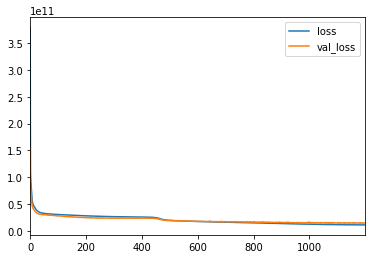

In [48]:
losses = pd.DataFrame(model.history.history)
losses.plot()#for the diagram it is clear  more epocs can provide better result

# evaluation on test data

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [50]:
X_test

array([[0.1       , 0.06666667, 0.03510274, ..., 0.0087531 , 0.63636364,
        0.        ],
       [0.3       , 0.3       , 0.14297945, ..., 0.00979727, 0.81818182,
        0.        ],
       [0.2       , 0.2       , 0.10359589, ..., 0.00539774, 0.90909091,
        0.        ],
       ...,
       [0.2       , 0.16666667, 0.09931507, ..., 0.00648901, 0.63636364,
        0.        ],
       [0.3       , 0.16666667, 0.12671233, ..., 0.00786745, 0.54545455,
        0.        ],
       [0.4       , 0.36666667, 0.23287671, ..., 0.0084418 , 0.18181818,
        1.        ]])

In [51]:
predictions = model.predict(X_test)

In [52]:
mean_absolute_error(y_test,predictions)

68053.1003870081

In [53]:
ANN_test_RMSE=np.sqrt(mean_squared_error(y_test,predictions))

In [54]:
print('ANN TEST RMSE:{}'.format(ANN_test_RMSE))

ANN TEST RMSE:120903.16948641925


In [55]:
explained_variance_score(y_test,predictions)

0.8808800871945163

In [56]:
print('mean:',df['price'].mean())
print('median:',df['price'].median())

mean: 540296.5735055795
median: 450000.0


# prediction on a single test value

In [57]:
single_house = df.drop('price',axis=1).iloc[30]

In [58]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [59]:
single_house.shape

(1, 19)

In [60]:
model.predict(single_house)

array([[573383.56]], dtype=float32)

In [61]:
df.iloc[30]

price            580500.0000
bedrooms              3.0000
bathrooms             2.5000
sqft_living        2320.0000
sqft_lot           3980.0000
floors                2.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 8.0000
sqft_above         2320.0000
sqft_basement         0.0000
yr_built           2003.0000
yr_renovated          0.0000
lat                  47.5391
long               -122.0700
sqft_living15      2580.0000
sqft_lot15         3980.0000
month                11.0000
year               2014.0000
Name: 30, dtype: float64

# XGBOOST Regressor

In [62]:
df['price'].sort_values(ascending=False)# we will drop house price greater than 4000000.0

7245     7700000.0
3910     7060000.0
9245     6890000.0
4407     5570000.0
1446     5350000.0
1313     5300000.0
1162     5110000.0
8085     4670000.0
2624     4500000.0
8629     4490000.0
12358    4210000.0
4145     4000000.0
2083     3850000.0
19002    3800000.0
7028     3800000.0
16288    3710000.0
18467    3650000.0
6502     3650000.0
19133    3640000.0
15241    3640000.0
2862     3600000.0
21560    3570000.0
5874     3420000.0
10435    3400000.0
7982     3400000.0
13954    3400000.0
20444    3350000.0
18185    3300000.0
18288    3300000.0
14070    3300000.0
           ...    
5634      100000.0
3441      100000.0
15442     100000.0
4559      100000.0
16326     100000.0
1216      100000.0
5298       99000.0
5718       96500.0
3801       95000.0
10573      95000.0
3318       95000.0
14567      95000.0
10758      92000.0
7985       90000.0
17566      90000.0
12539      90000.0
18924      90000.0
16516      90000.0
3106       89950.0
5860       89000.0
13743      86500.0
16700      8

In [63]:
df=df[df['price']<=4000000.0]
df['price'].max()

4000000.0

In [64]:
x=df.drop('price',axis=1)
y=df['price']
x.shape

(21586, 19)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.4,random_state=101)

In [66]:
X_dev, X_test, y_dev, y_test = train_test_split(X_val,y_val,test_size=0.5,random_state=1)

In [67]:
def evaluation(r,x_train,x_dev,y_train,y_dev):
    print("rmse of sale price for training set is {}".format(np.sqrt(mean_squared_error(y_train,(r.predict(X_train))))))
    print("rmse of sale price for dev set is {}".format(np.sqrt(mean_squared_error((y_dev),(r.predict(X_dev))))))

In [68]:
import xgboost as xgb
r=xgb.XGBRegressor(n_estimators=50000,learning_rate=0.01,reg_lambda=5,max_depth=2,colsample_bytree=0.75,max_features=0.75)

C:\Users\HP\Anaconda3\lib\site-packages\distributed\utils.py:139: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10051] A socket operation was attempted to an unreachable network
  RuntimeWarning,


In [69]:
r.fit(X_train,(y_train),eval_metric='rmse',eval_set=[(X_train,y_train),(X_dev,y_dev)],early_stopping_rounds=5)

[22:03:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-rmse:638417.87500	validation_1-rmse:637284.37500
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:633219.56250	validation_1-rmse:632015.81250
[2]	validation_0-rmse:627880.00000	validation_1-rmse:626640.50000
[3]	validation_0-rmse:622575.62500	validation_1-rmse:621307.93750
[4]	validation_0-rmse:617355.62500	validation_1-rmse:616052.81250
[5]	validation_0-rmse:612169.62500	validation_1-rmse:610838.81250
[6]	validation_0-rmse:607070.06250	validation_1-rmse:605

[115]	validation_0-rmse:291614.65625	validation_1-rmse:289254.71875
[116]	validation_0-rmse:290214.03125	validation_1-rmse:287827.81250
[117]	validation_0-rmse:288828.25000	validation_1-rmse:286501.59375
[118]	validation_0-rmse:287477.34375	validation_1-rmse:285168.81250
[119]	validation_0-rmse:286112.21875	validation_1-rmse:283766.56250
[120]	validation_0-rmse:284769.75000	validation_1-rmse:282432.59375
[121]	validation_0-rmse:283444.81250	validation_1-rmse:281078.03125
[122]	validation_0-rmse:282138.46875	validation_1-rmse:279820.65625
[123]	validation_0-rmse:280848.75000	validation_1-rmse:278539.90625
[124]	validation_0-rmse:279558.28125	validation_1-rmse:277234.03125
[125]	validation_0-rmse:278297.59375	validation_1-rmse:275973.78125
[126]	validation_0-rmse:277058.46875	validation_1-rmse:274715.56250
[127]	validation_0-rmse:275829.62500	validation_1-rmse:273495.96875
[128]	validation_0-rmse:274611.71875	validation_1-rmse:272245.62500
[129]	validation_0-rmse:273402.96875	validation_

[236]	validation_0-rmse:202081.76562	validation_1-rmse:201400.20312
[237]	validation_0-rmse:201745.84375	validation_1-rmse:201085.82812
[238]	validation_0-rmse:201420.23438	validation_1-rmse:200810.01562
[239]	validation_0-rmse:201083.98438	validation_1-rmse:200516.67188
[240]	validation_0-rmse:200768.28125	validation_1-rmse:200244.43750
[241]	validation_0-rmse:200412.34375	validation_1-rmse:199939.43750
[242]	validation_0-rmse:200085.32812	validation_1-rmse:199654.82812
[243]	validation_0-rmse:199791.81250	validation_1-rmse:199296.54688
[244]	validation_0-rmse:199486.32812	validation_1-rmse:199007.09375
[245]	validation_0-rmse:199183.59375	validation_1-rmse:198688.09375
[246]	validation_0-rmse:198882.57812	validation_1-rmse:198410.48438
[247]	validation_0-rmse:198576.67188	validation_1-rmse:198146.00000
[248]	validation_0-rmse:198293.21875	validation_1-rmse:197849.43750
[249]	validation_0-rmse:197995.93750	validation_1-rmse:197578.18750
[250]	validation_0-rmse:197678.00000	validation_

[357]	validation_0-rmse:175426.54688	validation_1-rmse:176843.03125
[358]	validation_0-rmse:175305.46875	validation_1-rmse:176695.75000
[359]	validation_0-rmse:175121.71875	validation_1-rmse:176526.48438
[360]	validation_0-rmse:174992.59375	validation_1-rmse:176358.98438
[361]	validation_0-rmse:174849.14062	validation_1-rmse:176227.20312
[362]	validation_0-rmse:174695.39062	validation_1-rmse:176097.23438
[363]	validation_0-rmse:174528.56250	validation_1-rmse:175976.71875
[364]	validation_0-rmse:174398.64062	validation_1-rmse:175868.50000
[365]	validation_0-rmse:174282.00000	validation_1-rmse:175726.31250
[366]	validation_0-rmse:174150.87500	validation_1-rmse:175626.89062
[367]	validation_0-rmse:174023.15625	validation_1-rmse:175518.60938
[368]	validation_0-rmse:173898.15625	validation_1-rmse:175425.39062
[369]	validation_0-rmse:173783.84375	validation_1-rmse:175316.68750
[370]	validation_0-rmse:173645.82812	validation_1-rmse:175184.82812
[371]	validation_0-rmse:173537.50000	validation_

[478]	validation_0-rmse:161969.85938	validation_1-rmse:164345.45312
[479]	validation_0-rmse:161884.78125	validation_1-rmse:164264.00000
[480]	validation_0-rmse:161818.35938	validation_1-rmse:164172.46875
[481]	validation_0-rmse:161690.23438	validation_1-rmse:164050.00000
[482]	validation_0-rmse:161616.04688	validation_1-rmse:163990.21875
[483]	validation_0-rmse:161549.93750	validation_1-rmse:163934.62500
[484]	validation_0-rmse:161464.70312	validation_1-rmse:163853.68750
[485]	validation_0-rmse:161377.85938	validation_1-rmse:163779.79688
[486]	validation_0-rmse:161286.31250	validation_1-rmse:163698.04688
[487]	validation_0-rmse:161206.68750	validation_1-rmse:163624.29688
[488]	validation_0-rmse:161141.98438	validation_1-rmse:163537.21875
[489]	validation_0-rmse:161032.54688	validation_1-rmse:163444.10938
[490]	validation_0-rmse:160965.45312	validation_1-rmse:163379.71875
[491]	validation_0-rmse:160893.90625	validation_1-rmse:163320.89062
[492]	validation_0-rmse:160823.26562	validation_

[599]	validation_0-rmse:152958.06250	validation_1-rmse:156165.06250
[600]	validation_0-rmse:152899.79688	validation_1-rmse:156109.07812
[601]	validation_0-rmse:152846.90625	validation_1-rmse:156059.40625
[602]	validation_0-rmse:152792.10938	validation_1-rmse:156000.54688
[603]	validation_0-rmse:152738.93750	validation_1-rmse:155950.73438
[604]	validation_0-rmse:152693.23438	validation_1-rmse:155897.85938
[605]	validation_0-rmse:152596.96875	validation_1-rmse:155806.56250
[606]	validation_0-rmse:152532.09375	validation_1-rmse:155754.62500
[607]	validation_0-rmse:152474.14062	validation_1-rmse:155704.60938
[608]	validation_0-rmse:152388.15625	validation_1-rmse:155635.59375
[609]	validation_0-rmse:152313.70312	validation_1-rmse:155591.71875
[610]	validation_0-rmse:152255.65625	validation_1-rmse:155541.25000
[611]	validation_0-rmse:152175.51562	validation_1-rmse:155469.20312
[612]	validation_0-rmse:152113.14062	validation_1-rmse:155414.17188
[613]	validation_0-rmse:152057.26562	validation_

[720]	validation_0-rmse:146912.87500	validation_1-rmse:150733.57812
[721]	validation_0-rmse:146879.54688	validation_1-rmse:150709.43750
[722]	validation_0-rmse:146833.56250	validation_1-rmse:150675.45312
[723]	validation_0-rmse:146801.73438	validation_1-rmse:150651.18750
[724]	validation_0-rmse:146762.71875	validation_1-rmse:150607.78125
[725]	validation_0-rmse:146726.73438	validation_1-rmse:150578.25000
[726]	validation_0-rmse:146672.85938	validation_1-rmse:150533.78125
[727]	validation_0-rmse:146641.39062	validation_1-rmse:150498.23438
[728]	validation_0-rmse:146604.73438	validation_1-rmse:150472.45312
[729]	validation_0-rmse:146572.20312	validation_1-rmse:150443.79688
[730]	validation_0-rmse:146520.18750	validation_1-rmse:150409.21875
[731]	validation_0-rmse:146483.03125	validation_1-rmse:150377.03125
[732]	validation_0-rmse:146454.79688	validation_1-rmse:150334.34375
[733]	validation_0-rmse:146419.71875	validation_1-rmse:150300.85938
[734]	validation_0-rmse:146349.93750	validation_

[841]	validation_0-rmse:142651.43750	validation_1-rmse:146993.40625
[842]	validation_0-rmse:142626.70312	validation_1-rmse:146973.28125
[843]	validation_0-rmse:142589.37500	validation_1-rmse:146944.62500
[844]	validation_0-rmse:142560.29688	validation_1-rmse:146914.04688
[845]	validation_0-rmse:142518.26562	validation_1-rmse:146878.03125
[846]	validation_0-rmse:142487.20312	validation_1-rmse:146844.56250
[847]	validation_0-rmse:142450.65625	validation_1-rmse:146816.62500
[848]	validation_0-rmse:142432.03125	validation_1-rmse:146798.12500
[849]	validation_0-rmse:142407.29688	validation_1-rmse:146779.23438
[850]	validation_0-rmse:142383.68750	validation_1-rmse:146760.09375
[851]	validation_0-rmse:142365.40625	validation_1-rmse:146742.06250
[852]	validation_0-rmse:142325.53125	validation_1-rmse:146717.51562
[853]	validation_0-rmse:142295.98438	validation_1-rmse:146694.92188
[854]	validation_0-rmse:142272.90625	validation_1-rmse:146667.20312
[855]	validation_0-rmse:142246.54688	validation_

[962]	validation_0-rmse:139634.21875	validation_1-rmse:144334.17188
[963]	validation_0-rmse:139617.57812	validation_1-rmse:144320.92188
[964]	validation_0-rmse:139602.39062	validation_1-rmse:144306.15625
[965]	validation_0-rmse:139585.32812	validation_1-rmse:144284.26562
[966]	validation_0-rmse:139553.25000	validation_1-rmse:144264.51562
[967]	validation_0-rmse:139514.82812	validation_1-rmse:144240.60938
[968]	validation_0-rmse:139500.42188	validation_1-rmse:144229.29688
[969]	validation_0-rmse:139479.17188	validation_1-rmse:144205.31250
[970]	validation_0-rmse:139462.06250	validation_1-rmse:144191.62500
[971]	validation_0-rmse:139444.00000	validation_1-rmse:144175.23438
[972]	validation_0-rmse:139429.60938	validation_1-rmse:144166.45312
[973]	validation_0-rmse:139412.21875	validation_1-rmse:144152.57812
[974]	validation_0-rmse:139387.50000	validation_1-rmse:144122.46875
[975]	validation_0-rmse:139366.93750	validation_1-rmse:144099.50000
[976]	validation_0-rmse:139349.21875	validation_

[1082]	validation_0-rmse:137468.10938	validation_1-rmse:142357.10938
[1083]	validation_0-rmse:137452.84375	validation_1-rmse:142345.43750
[1084]	validation_0-rmse:137440.32812	validation_1-rmse:142335.57812
[1085]	validation_0-rmse:137421.73438	validation_1-rmse:142320.17188
[1086]	validation_0-rmse:137405.15625	validation_1-rmse:142306.62500
[1087]	validation_0-rmse:137391.92188	validation_1-rmse:142289.39062
[1088]	validation_0-rmse:137380.75000	validation_1-rmse:142280.84375
[1089]	validation_0-rmse:137350.32812	validation_1-rmse:142263.40625
[1090]	validation_0-rmse:137324.87500	validation_1-rmse:142248.79688
[1091]	validation_0-rmse:137315.65625	validation_1-rmse:142238.04688
[1092]	validation_0-rmse:137304.14062	validation_1-rmse:142229.93750
[1093]	validation_0-rmse:137276.75000	validation_1-rmse:142211.46875
[1094]	validation_0-rmse:137259.98438	validation_1-rmse:142197.54688
[1095]	validation_0-rmse:137246.48438	validation_1-rmse:142185.60938
[1096]	validation_0-rmse:137234.64

[1201]	validation_0-rmse:135673.70312	validation_1-rmse:140853.84375
[1202]	validation_0-rmse:135663.64062	validation_1-rmse:140845.76562
[1203]	validation_0-rmse:135655.92188	validation_1-rmse:140839.14062
[1204]	validation_0-rmse:135639.25000	validation_1-rmse:140832.32812
[1205]	validation_0-rmse:135625.89062	validation_1-rmse:140821.54688
[1206]	validation_0-rmse:135614.84375	validation_1-rmse:140815.20312
[1207]	validation_0-rmse:135604.31250	validation_1-rmse:140807.09375
[1208]	validation_0-rmse:135594.56250	validation_1-rmse:140799.03125
[1209]	validation_0-rmse:135581.54688	validation_1-rmse:140790.45312
[1210]	validation_0-rmse:135573.89062	validation_1-rmse:140783.32812
[1211]	validation_0-rmse:135558.67188	validation_1-rmse:140770.64062
[1212]	validation_0-rmse:135547.81250	validation_1-rmse:140756.28125
[1213]	validation_0-rmse:135538.07812	validation_1-rmse:140748.39062
[1214]	validation_0-rmse:135523.93750	validation_1-rmse:140737.18750
[1215]	validation_0-rmse:135508.89

[1320]	validation_0-rmse:134219.43750	validation_1-rmse:139760.00000
[1321]	validation_0-rmse:134207.25000	validation_1-rmse:139750.54688
[1322]	validation_0-rmse:134195.67188	validation_1-rmse:139741.21875
[1323]	validation_0-rmse:134182.81250	validation_1-rmse:139726.54688
[1324]	validation_0-rmse:134174.25000	validation_1-rmse:139720.51562
[1325]	validation_0-rmse:134166.06250	validation_1-rmse:139714.98438
[1326]	validation_0-rmse:134159.78125	validation_1-rmse:139709.03125
[1327]	validation_0-rmse:134150.54688	validation_1-rmse:139698.20312
[1328]	validation_0-rmse:134135.37500	validation_1-rmse:139674.20312
[1329]	validation_0-rmse:134121.70312	validation_1-rmse:139662.15625
[1330]	validation_0-rmse:134113.59375	validation_1-rmse:139655.75000
[1331]	validation_0-rmse:134102.28125	validation_1-rmse:139647.71875
[1332]	validation_0-rmse:134094.73438	validation_1-rmse:139644.39062
[1333]	validation_0-rmse:134087.45312	validation_1-rmse:139639.18750
[1334]	validation_0-rmse:134056.01

[1439]	validation_0-rmse:132792.75000	validation_1-rmse:138774.09375
[1440]	validation_0-rmse:132781.06250	validation_1-rmse:138767.04688
[1441]	validation_0-rmse:132773.17188	validation_1-rmse:138762.98438
[1442]	validation_0-rmse:132740.92188	validation_1-rmse:138737.73438
[1443]	validation_0-rmse:132717.45312	validation_1-rmse:138728.62500
[1444]	validation_0-rmse:132692.68750	validation_1-rmse:138718.43750
[1445]	validation_0-rmse:132682.39062	validation_1-rmse:138709.07812
[1446]	validation_0-rmse:132676.95312	validation_1-rmse:138706.93750
[1447]	validation_0-rmse:132670.68750	validation_1-rmse:138702.32812
[1448]	validation_0-rmse:132663.35938	validation_1-rmse:138695.92188
[1449]	validation_0-rmse:132654.40625	validation_1-rmse:138688.85938
[1450]	validation_0-rmse:132646.20312	validation_1-rmse:138690.09375
[1451]	validation_0-rmse:132634.95312	validation_1-rmse:138684.73438
[1452]	validation_0-rmse:132619.54688	validation_1-rmse:138676.76562
[1453]	validation_0-rmse:132604.45

[1558]	validation_0-rmse:131371.51562	validation_1-rmse:137791.95312
[1559]	validation_0-rmse:131365.53125	validation_1-rmse:137787.09375
[1560]	validation_0-rmse:131351.17188	validation_1-rmse:137777.65625
[1561]	validation_0-rmse:131346.35938	validation_1-rmse:137779.35938
[1562]	validation_0-rmse:131323.43750	validation_1-rmse:137766.50000
[1563]	validation_0-rmse:131314.09375	validation_1-rmse:137753.85938
[1564]	validation_0-rmse:131306.93750	validation_1-rmse:137752.57812
[1565]	validation_0-rmse:131296.76562	validation_1-rmse:137749.73438
[1566]	validation_0-rmse:131290.46875	validation_1-rmse:137745.51562
[1567]	validation_0-rmse:131285.64062	validation_1-rmse:137745.43750
[1568]	validation_0-rmse:131280.23438	validation_1-rmse:137740.64062
[1569]	validation_0-rmse:131254.40625	validation_1-rmse:137720.93750
[1570]	validation_0-rmse:131235.01562	validation_1-rmse:137714.26562
[1571]	validation_0-rmse:131227.15625	validation_1-rmse:137707.10938
[1572]	validation_0-rmse:131208.12

[1677]	validation_0-rmse:130301.58594	validation_1-rmse:137120.37500
[1678]	validation_0-rmse:130296.01562	validation_1-rmse:137116.07812
[1679]	validation_0-rmse:130287.14844	validation_1-rmse:137112.79688
[1680]	validation_0-rmse:130280.84375	validation_1-rmse:137110.82812
[1681]	validation_0-rmse:130276.71094	validation_1-rmse:137106.18750
[1682]	validation_0-rmse:130270.17188	validation_1-rmse:137101.29688
[1683]	validation_0-rmse:130261.32812	validation_1-rmse:137103.48438
[1684]	validation_0-rmse:130252.11719	validation_1-rmse:137095.64062
[1685]	validation_0-rmse:130247.32031	validation_1-rmse:137094.21875
[1686]	validation_0-rmse:130242.09375	validation_1-rmse:137091.43750
[1687]	validation_0-rmse:130238.00000	validation_1-rmse:137087.42188
[1688]	validation_0-rmse:130231.52344	validation_1-rmse:137089.28125
[1689]	validation_0-rmse:130222.31250	validation_1-rmse:137082.93750
[1690]	validation_0-rmse:130214.50781	validation_1-rmse:137080.40625
[1691]	validation_0-rmse:130208.26

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=2,
             max_features=0.75, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50000, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=5,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [70]:
r1=xgb.XGBRegressor(n_estimators=50000,learning_rate=0.01,reg_lambda=5,max_depth=2,colsample_bytree=0.75,max_features=0.75).fit(X_train,y_train)

[22:04:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [71]:
evaluation(r1,X_train,X_dev,y_train,y_dev)

rmse of sale price for training set is 76241.36640977857
rmse of sale price for dev set is 115316.75405959407


In [72]:
XGB_TEST_RMSE=np.sqrt(mean_squared_error(y_test,(r1.predict(X_test))))

In [73]:
print('RMSE on test dataset is {}'.format(np.sqrt(mean_squared_error(y_test,(r1.predict(X_test))))))

RMSE on test dataset is 110101.51696055039


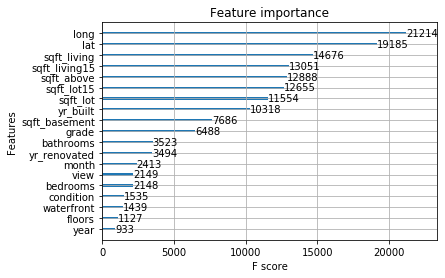

In [74]:
xgb.plot_importance(r1)

# prediction on  test value

In [75]:
prediction=r1.predict(X_test)

In [76]:
result=pd.DataFrame({'Predicted':prediction,'Test':y_test})
result.head()


,Predicted,Test
5895,677415.187500,942500.0
1757,476022.656250,535000.0
12855,162477.890625,132500.0
20832,291663.187500,353000.0
8162,527853.875000,630000.0


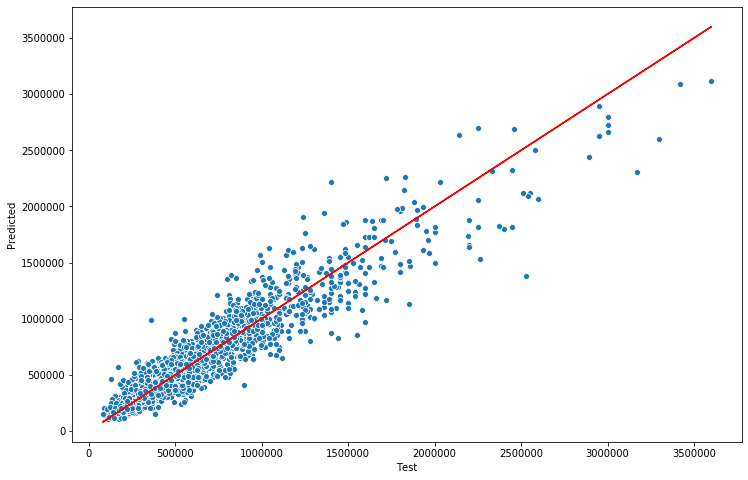

In [77]:
plt.figure(figsize=(12,8))
sns.scatterplot('Test','Predicted',data=result)
plt.plot('Test','Test',data=result,color='red')



# Decision Tree Regressor with CV


In [78]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [79]:
tree_rmse=np.sqrt(mean_squared_error(y_dev,tree_reg.predict(X_dev)))
print('RMSE OF DECISION TREE REGRESSOR ON DEV SET:{}'.format(tree_rmse))

RMSE OF DECISION TREE REGRESSOR ON DEV SET:179787.8326649665


In [80]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(tree_reg,X_dev,y_dev,scoring='neg_mean_squared_error',cv=10)
rmse=np.sqrt(-score)
print(rmse)
print('Mean of RMSE:{}'.format(rmse.mean()))
print('Std of RMSE:{}'.format(rmse.std()))

[207531.50184058 194717.03245361 217600.46960755 224424.64884979
 190907.26603923 156429.80492225 204972.00452015 180947.32210864
 163079.82488593 161479.73136825]
Mean of RMSE:190208.9606595996
Std of RMSE:22908.522985890784


In [81]:
Decision_Tree_Test_MSE=np.sqrt(mean_squared_error(y_test,(tree_reg.predict(X_test))))

In [82]:
print('TEST MSE:{}'.format(np.sqrt(mean_squared_error(y_test,(tree_reg.predict(X_test))))))

TEST MSE:170543.3205893484


#  RANDOM FOREST REGRESSOR WITH CV

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [85]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [4,8,12,16,19]},
{'bootstrap': [False], 'n_estimators': [3, 10,30], 'max_features': [4,8,12,16,19]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [4, 8, 12, 16, 19],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False],
                          'max_features': [4, 8, 12, 16, 19],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [86]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 30}

In [87]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=8, n_estimators=30)

In [88]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

158992.55077769107 {'max_features': 4, 'n_estimators': 3}
141133.62803593217 {'max_features': 4, 'n_estimators': 10}
131735.588314916 {'max_features': 4, 'n_estimators': 30}
153442.4952673587 {'max_features': 8, 'n_estimators': 3}
129252.58664159257 {'max_features': 8, 'n_estimators': 10}
125369.58280791792 {'max_features': 8, 'n_estimators': 30}
149059.83509376686 {'max_features': 12, 'n_estimators': 3}
129743.58040259827 {'max_features': 12, 'n_estimators': 10}
124646.3401354396 {'max_features': 12, 'n_estimators': 30}
149261.6819027517 {'max_features': 16, 'n_estimators': 3}
128991.78957774772 {'max_features': 16, 'n_estimators': 10}
124416.79478778184 {'max_features': 16, 'n_estimators': 30}
145078.20278943313 {'max_features': 19, 'n_estimators': 3}
131233.5423047674 {'max_features': 19, 'n_estimators': 10}
125050.58159107984 {'max_features': 19, 'n_estimators': 30}
158953.05885500385 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
135871.0502781207 {'bootstrap': False, 

In [89]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.00387216, 0.03532016, 0.19626489, 0.01679923, 0.00287368,
       0.02665488, 0.02367768, 0.00415317, 0.21591963, 0.0611836 ,
       0.00996895, 0.04137634, 0.00264342, 0.1659725 , 0.06722613,
       0.09961949, 0.01747889, 0.00716953, 0.00182568])

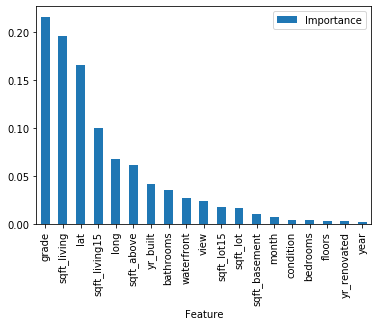

In [91]:
feature_importance=pd.DataFrame({'Feature':X_train.columns,'Importance':feature_importances})
feature_importance=feature_importance.set_index('Feature')
feature_importance.sort_values(by='Importance',ascending=False).plot.bar()

In [90]:
forest=RandomForestRegressor(max_features=8,n_estimators=30,bootstrap=False).fit(X_train,y_train)
prediction=forest.predict(X_test)
result=pd.DataFrame({'Test_data':y_test,'Prediction':prediction})
result.head()

,Test_data,Prediction
19096,240000.0,250066.666667
13653,612000.0,535128.333333
9161,569999.0,487360.000000
3456,1080000.0,745411.266667
13630,327000.0,460741.666667


In [92]:
print('TEST RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,prediction))))

TEST RMSE:123824.5307806259


In [93]:
random_forest_test_rmse=np.sqrt(mean_squared_error(y_test,prediction))

# summary

In [94]:
print('ANN TEST RMSE:{}'.format(ANN_test_RMSE))
print('XGBOOST TEST RMSE:{}'.format(XGB_TEST_RMSE))
print('DECISION TREE TEST RMSE:{}'.format(Decision_Tree_Test_MSE))
print('RANDOM FOREST TEST RMSE:{}'.format(random_forest_test_rmse))

ANN TEST RMSE:120903.16948641925
XGBOOST TEST RMSE:110101.51696055039
DECISION TREE TEST RMSE:170543.3205893484
RANDOM FOREST TEST RMSE:123824.5307806259
